In [1]:
import numpy as np
from opendrift.readers import reader_ROMS_intake
from opendrift.models.oceandrift import OceanDrift
import intake
import xarray as xr

In [2]:
intake_catalog = 'https://mghp.osn.xsede.org/rsignellbucket1/rsignell/testing/cnaps.yml'
cat = intake.open_catalog(intake_catalog)
list(cat)

['CNAPS_Forecast_Archive', 'CNAPS_Forecast_Archive_64', 'CNAPS_opendrift']

In [3]:
dataset = 'CNAPS_opendrift'
ds = cat[dataset].to_dask()

In [4]:
ds.u

<xarray.DataArray 'u' (ocean_time: 57, s_rho: 36, eta_u: 482, xi_u: 401)>
dask.array<open_dataset-u, shape=(57, 36, 482, 401), dtype=float32, chunksize=(1, 36, 482, 401), chunktype=numpy.ndarray>
Coordinates:
    lat_u       (eta_u, xi_u) float64 dask.array<chunksize=(482, 401), meta=np.ndarray>
    lon_u       (eta_u, xi_u) float64 dask.array<chunksize=(482, 401), meta=np.ndarray>
  * ocean_time  (ocean_time) float64 5.205e+09 5.205e+09 ... 5.206e+09 5.206e+09
  * s_rho       (s_rho) float64 -0.9861 -0.9583 -0.9306 ... -0.04167 -0.01389
Dimensions without coordinates: eta_u, xi_u
Attributes:
    field:      u-velocity, scalar, series
    grid:       grid
    location:   edge1
    long_name:  u-momentum component
    time:       ocean_time
    units:      meter second-1

In [5]:
o = OceanDrift(loglevel=20)  # Set loglevel to 0 for debug information

12:25:15 INFO    opendrift.models.basemodel:528: OpenDriftSimulation initialised (version 1.10.7)


In [6]:
cnaps = reader_ROMS_intake.Reader(intake_catalog=intake_catalog, dataset=dataset)
o.add_reader(cnaps)

12:25:15 INFO    opendrift.readers.reader_ROMS_intake:94: Opening dataset: CNAPS_opendrift
12:25:18 INFO    opendrift.readers.reader_ROMS_intake:173: Read GLS parameters from file.
12:25:18 WARNING opendrift.readers.basereader.structured:44: No proj string or projection could be derived, using 'fakeproj'. This assumes that the variables are structured and gridded approximately equidistantly on the surface (i.e. in meters). This must be guaranteed by the user. You can get rid of this warning by supplying a valid projection to the reader.
12:25:18 INFO    opendrift.readers.basereader.structured:59: Making interpolator for lon,lat to x,y conversion...


In [7]:
#%%
# Creating and adding reader for Nordic 4km current dataset
#nordic_native = reader_ROMS_native.Reader(o.test_data_folder() +
#    '2Feb2016_Nordic_sigma_3d/Nordic-4km_SLEVELS_avg_00_subset2Feb2016.nc')
#o.add_reader(nordic_native)

In [8]:
#%%
# Seed elements at defined positions, depth and time
o.seed_elements(lon=-69.0, lat=42.0, radius=0, number=10,
                z=np.linspace(0, -150, 10), time=cnaps.start_time)

12:25:27 INFO    opendrift.models.basemodel.environment:219: Adding a dynamical landmask with max. priority based on assumed maximum speed of 1.0 m/s. Adding a customised landmask may be faster...
12:25:33 INFO    opendrift.models.basemodel.environment:246: Fallback values will be used for the following variables which have no readers: 
12:25:33 INFO    opendrift.models.basemodel.environment:249: 	x_wind: 0.000000
12:25:33 INFO    opendrift.models.basemodel.environment:249: 	y_wind: 0.000000
12:25:33 INFO    opendrift.models.basemodel.environment:249: 	ocean_vertical_diffusivity: 0.000000
12:25:33 INFO    opendrift.models.basemodel.environment:249: 	sea_surface_wave_significant_height: 0.000000
12:25:33 INFO    opendrift.models.basemodel.environment:249: 	sea_surface_wave_stokes_drift_x_velocity: 0.000000
12:25:33 INFO    opendrift.models.basemodel.environment:249: 	sea_surface_wave_stokes_drift_y_velocity: 0.000000
12:25:33 INFO    opendrift.models.basemodel.environment:249: 	sea_surf

In [9]:
#%%
# Running model
o.run(time_step=3600)

12:25:33 INFO    opendrift.models.basemodel:1816: Duration, steps or end time not specified, running until end of first reader: 2023-11-03 00:00:00
12:25:33 INFO    opendrift.models.basemodel:1816: Duration, steps or end time not specified, running until end of first reader: 2023-11-03 00:00:00
12:25:33 INFO    opendrift.models.basemodel:891: Using existing reader for land_binary_mask
12:25:34 INFO    opendrift.models.basemodel:903: All points are in ocean
12:25:34 INFO    opendrift.models.basemodel.environment:670: ========================
12:25:34 ERROR   opendrift.models.basemodel.environment:671: Index is out of bounds for axis 0 with size 57
Traceback (most recent call last):
  File "/home/conda/global/e1003848400f1afa7580bb6fa3874f48f20b3522458965117a29babee3516098-20231112-153522-163623-16-opendrift/lib/python3.11/site-packages/opendrift/models/basemodel/environment.py", line 646, in get_environment
    reader.get_variables_interpolated(
  File "/home/conda/global/e1003848400f1a

12:25:39 WARNING opendrift.models.basemodel:2357: Plotting fast. This will make your plots less accurate.


--------------------
Reader performance:
--------------------
global_landmask
 0:00:00.0  total
 0:00:00.0  preparing
 0:00:00.0  reading
 0:00:00.0  masking
--------------------
Performance:
   24.1 total time
   17.6 configuration
    1.0 preparing main loop
      1.0 moving elements to ocean
    5.4 main loop
      0.0 updating elements
    0.0 cleaning up
--------------------
Model:	OceanDrift     (OpenDrift version 1.10.7)
	10 active Lagrangian3DArray particles  (0 deactivated, 0 scheduled)
-------------------
Environment variables:
  -----
  land_binary_mask
     1) global_landmask
  -----
Readers not added for the following variables:
  ocean_mixed_layer_thickness
  ocean_vertical_diffusivity
  sea_floor_depth_below_sea_level
  sea_surface_swell_wave_peak_period_from_variance_spectral_density
  sea_surface_swell_wave_significant_height
  sea_surface_swell_wave_to_direction
  sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment
  sea_surface_wave_pe

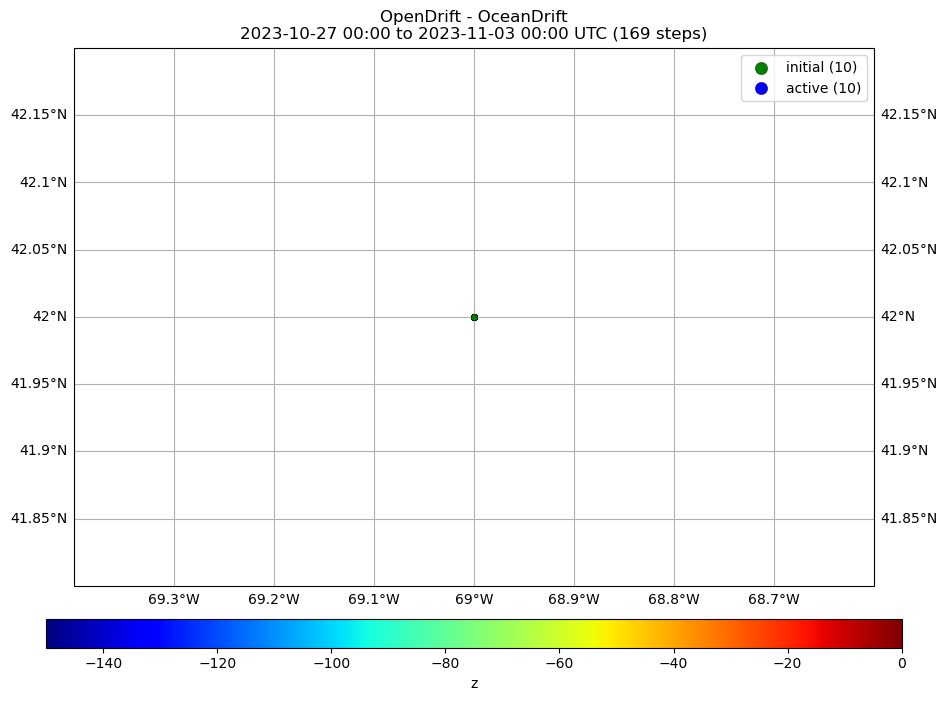

(<GeoAxes: title={'center': 'OpenDrift - OceanDrift\n2023-10-27 00:00 to 2023-11-03 00:00 UTC (169 steps)'}>,
 <Figure size 1100x740.098 with 2 Axes>)

In [10]:
#%%
# Print and plot results, with lines colored by particle depth
print(o)
o.plot(linecolor='z', fast=True)
#o.animation()